In [1]:
#for data preprocessing
import pandas as pd

#for matrix math
import numpy as np

#for plotting
import seaborn as sns                #style setting
import matplotlib.pyplot as plt      #graph plotting

#Standardise data value
from sklearn.preprocessing import StandardScaler

#Split data for train and test
from sklearn.model_selection import train_test_split

#supervised algorithm
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#Overfitting avoidance
from sklearn import model_selection

#remove warning message
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Dataset
sold = pd.read_csv('data/SKU Sold Detail.csv')
sold

,Region,BU_ID,Country,Month_Year,Revenue,SOLD_Status
0,AMER,11,United States,Apr21,265.97,1
1,AMER,11,United States,Apr21,13.08,1
2,AMER,11,United States,Apr21,92.00,1
3,AMER,11,United States,Apr21,77646.33,1
4,AMER,11,United States,Apr21,478.85,1
...,...,...,...,...,...,...
23566,EMEA,6969,South Africa,Jan22,52.91,1
23567,EMEA,6969,South Africa,Jan22,208.69,1
23568,EMEA,6969,South Africa,Jan22,102.41,1
23569,EMEA,6969,South Africa,Jan22,0.00,0


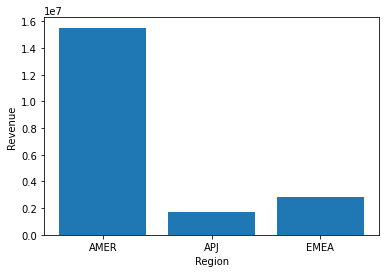

In [3]:
region = sold['Region']
revenue = sold['Revenue']
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.bar(region,revenue)
plt.show()

In [4]:
#detect missing value in data frame
sold.isnull().any()

Region         False
BU_ID          False
Country        False
Month_Year     False
Revenue        False
SOLD_Status    False
dtype: bool

In [5]:
numericalData = sold[["Country","Revenue","SOLD_Status"]]
numericalData.head()

,Country,Revenue,SOLD_Status
0,United States,265.97,1
1,United States,13.08,1
2,United States,92.00,1
3,United States,77646.33,1
4,United States,478.85,1


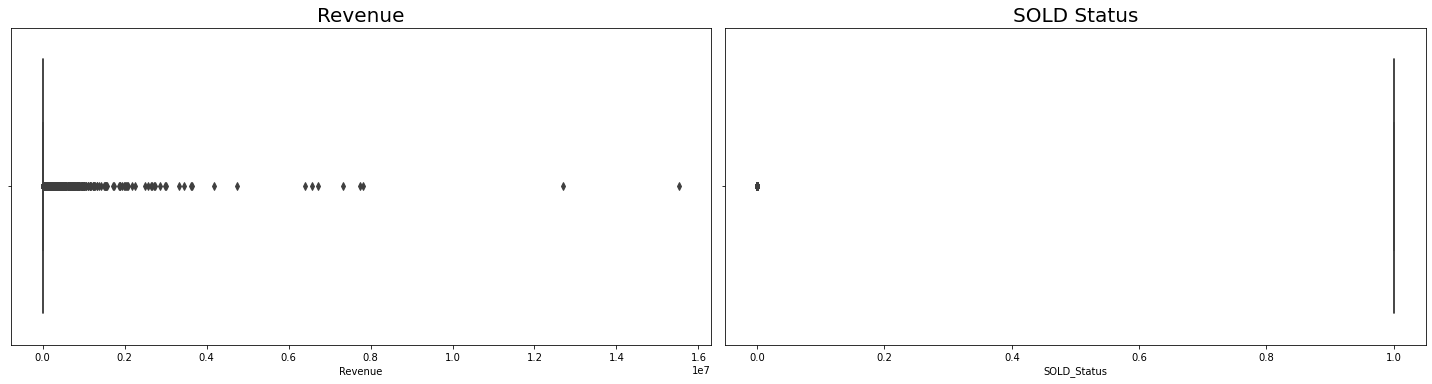

In [6]:
#format the figure size to 20rows,10cols
fig, ax = plt.subplots(figsize = (20,10))

#plot graph by Revenue Apr21
plt.subplot(221)
sns.boxplot(x = numericalData["Revenue"])
plt.title("Revenue", fontsize = 20)

#plot graph by Revenue Oct21
plt.subplot(222)
sns.boxplot(x = numericalData["SOLD_Status"])
plt.title("SOLD Status", fontsize = 20)

plt.tight_layout()
plt.show()


In [7]:
sorted(numericalData['Revenue'])
q1, q3, m= np.percentile(numericalData['Revenue'],[25,75,50])
iqr = q3 - q1
lowerb = q1 - (1.5 * iqr)
upperb = q3 + (1.5 * iqr)
print("Revenue LowerB: ",lowerb)
print("Revenue Upper B: ",upperb)

median = numericalData.loc[numericalData['Revenue']<= upperb,'Revenue'].median()
numericalData.loc[numericalData['Revenue']> upperb,'Revenue'] = np.nan
numericalData.fillna(median,inplace=True)

sorted(numericalData['SOLD_Status'])
q1, q3, m= np.percentile(numericalData['SOLD_Status'],[25,75,50])
iqr = q3 - q1
lowerb = q1 - (1.5 * iqr)
upperb = q3 + (1.5 * iqr)
print("SOLD_Status LowerB: ",lowerb)
print("SOLD_Status Upper B: ",upperb)

median = numericalData.loc[numericalData['SOLD_Status']<= upperb,'SOLD_Status'].median()
numericalData.loc[numericalData['SOLD_Status']> upperb,'SOLD_Status'] = np.nan
numericalData.fillna(median,inplace=True)

Revenue LowerB:  -3122.6525000000006
Revenue Upper B:  5245.007500000001
SOLD_Status LowerB:  1.0
SOLD_Status Upper B:  1.0


In [8]:
numericalData.head()

,Country,Revenue,SOLD_Status
0,United States,265.97,1.0
1,United States,13.08,1.0
2,United States,92.00,1.0
3,United States,117.47,1.0
4,United States,478.85,1.0


In [9]:
#categorical data (those that not in numericalData variable)
categoricalData = sold[["Region","Country","Month_Year"]]

#print
categoricalData.head()

,Region,Country,Month_Year
0,AMER,United States,Apr21
1,AMER,United States,Apr21
2,AMER,United States,Apr21
3,AMER,United States,Apr21
4,AMER,United States,Apr21


In [10]:
#concatenate the categorical data and numerical data together as nwData
combine = pd.concat([categoricalData,numericalData.iloc[:,1:]],axis=1)
combine.head(5)

,Region,Country,Month_Year,Revenue,SOLD_Status
0,AMER,United States,Apr21,265.97,1.0
1,AMER,United States,Apr21,13.08,1.0
2,AMER,United States,Apr21,92.00,1.0
3,AMER,United States,Apr21,117.47,1.0
4,AMER,United States,Apr21,478.85,1.0


In [11]:
combine.describe()

,Revenue,SOLD_Status
count,23571.000000,23571.000000
mean,529.831439,0.773917
std,985.140564,0.418302
min,0.000000,0.000000
25%,15.220000,1.000000
50%,117.470000,1.000000
75%,472.350000,1.000000
max,5244.720000,1.000000


In [12]:
#drop the Revenue_Jan22,Country for x variable that is to be used as the feature selections
#choose the Apr21 as the y variable that acts as the label
#split the x variable and y variable into test set (30%) and train set (70%)
X = combine.drop(['Revenue','Country','Region','Month_Year'],axis=1)
y = combine['Revenue']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
#standardize the numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#Random Forest algorithm
randomforest = RandomForestClassifier()

#train using the algorithm
randomforest.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=randomforest.predict(X_test)

In [15]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("Precision Score: ",precision_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Confusion Matrix:  [[1596    0]
 [   0 5476]]
Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0


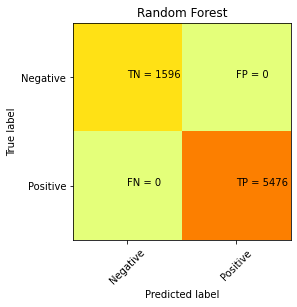

In [16]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [17]:
#Logistic Regression algorithm
lr = LogisticRegression()

#train using the algorithm
lr.fit(X_train, y_train)

#use the trained set to do prediction on test set
y_pred = lr.predict(X_test)

In [18]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("Precision Score: ",precision_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Confusion Matrix:  [[1596    0]
 [ 310 5166]]
Accuracy Score:  0.9561651583710408
Recall Score:  0.9433893352812271
Precision Score:  1.0
F1 Score:  0.9708701371922571


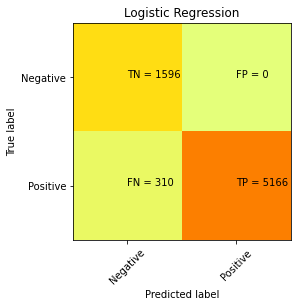

In [19]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [20]:
#Support Vector Machine algorithm
svc=SVC()

#train using the algorithm
svc.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=svc.predict(X_test)

In [21]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("Precision Score: ",precision_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Confusion Matrix:  [[1596    0]
 [ 224 5252]]
Accuracy Score:  0.9683257918552036
Recall Score:  0.9590942293644996
Precision Score:  1.0
F1 Score:  0.9791200596569724


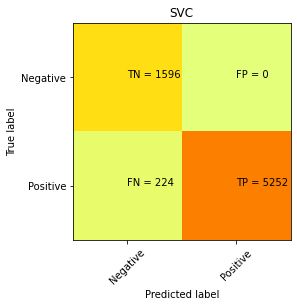

In [22]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVC')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [23]:
#K-Nearest Neighbour algorithm
neigh = KNeighborsClassifier(n_neighbors=3)

#train using the algorithm
neigh.fit(X_train,y_train) 

#use the trained set to do prediction on test set
y_pred=neigh.predict(X_test)

In [24]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("Precision Score: ",precision_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Confusion Matrix:  [[1596    0]
 [   0 5476]]
Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0


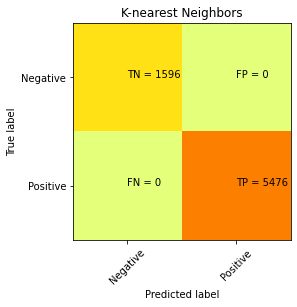

In [25]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('K-nearest Neighbors')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [26]:
#Gaussian Naive Bayes algorithm
nb = GaussianNB()

#train using the algorithm
nb.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=nb.predict(X_test)

In [27]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("Precision Score: ",precision_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Confusion Matrix:  [[1596    0]
 [   0 5476]]
Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0


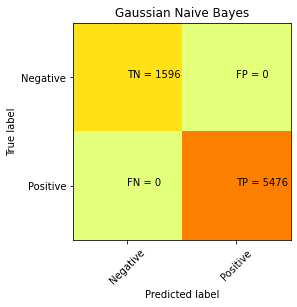

In [28]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Gaussian Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [29]:
#Decision Tree algorithm
dt = DecisionTreeClassifier()

#train using the algorithm
dt.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred=dt.predict(X_test)

In [30]:
#print the confucsion matrix, accuracy score, precision and recall 
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("Precision Score: ",precision_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Confusion Matrix:  [[1596    0]
 [   0 5476]]
Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0


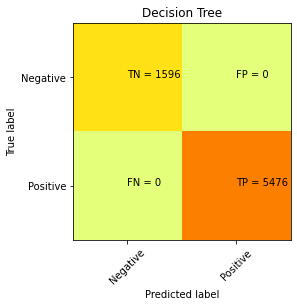

In [31]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [32]:
#Overfitting avoidance
model = LogisticRegression()
kfold = model_selection.KFold(n_splits=5)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% " % (results.mean()*100.0))
print("Standard deviation: %.3f%% " % (results.std()*100.0))

Accuracy: 99.932% 
Standard deviation: 0.034% 
